Raster CRS: EPSG:32631
Raster Transform: | 0.50, 0.00, 627916.50|
| 0.00,-0.50, 5804053.00|
| 0.00, 0.00, 1.00|


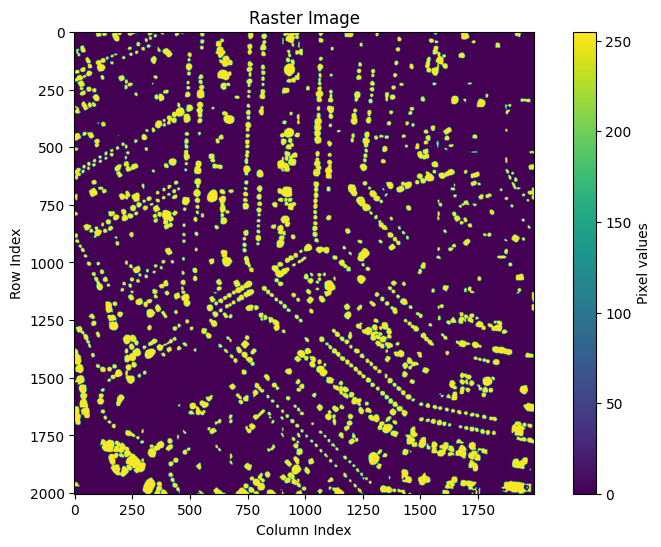

In [24]:
import rasterio as rio
from rasterio.crs import CRS
import matplotlib.pyplot as plt

# Specify the path to your raster file
raster_path = "/Users/michiel/Documents/code/SCL/images/Lukas/verification.tif"

# Load the raster data
with rio.open(raster_path) as src:
    # Read the first band (change index if needed)
    band1 = src.read(1)
    # Get metadata (optional)
    print(f"Raster CRS: {src.crs}")
    print(f"Raster Transform: {src.transform}")

# Plotting the raster data
plt.figure(figsize=(10, 6))
plt.imshow(band1)  # You can change colormap as needed
plt.colorbar(label='Pixel values')
plt.title('Raster Image')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()


In [3]:
import pandas as pd 
import geopandas as gpd
df2 = pd.read_csv('/Users/michiel/Documents/code/SCL/BOMEN.csv', delimiter = ';')
df2.head()

,OBJECTNUMMER,id,soortnaam,soortnaamKort,SoortnaamNL,soortnaamTop,boomhoogteklasseActueel,stamdiameterklasse,jaarVanAanleg,typeObject,standplaatsGedetailleerd,typeBeheerderPlus,typeEigenaarPlus,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,1,919934,Ulmus hollandica `Vegeta`,Ulmus,Huntingdon-iep,Iep (Ulmus),b. 6 tot 9 m.,NaN,1978,Boom niet vrij uitgroeiend,Tegels,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.9026919 52.340093),POINT(52.340093 4.9026919),4.902692,52.340093
1,2,919935,Fraxinus excelsior `Westhof`s Glorie`,Fraxinus,Gewone es (cultuurvariëteit),Es (Fraxinus),c. 9 tot 12 m.,"0,2 tot 0,3 m.",1990,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.8552081 52.331984),POINT(52.331984 4.8552081),4.855208,52.331984
2,3,919936,Ulmus glabra `Lutescens`,Ulmus,Gele bergiep (cultuurvariëteit),Iep (Ulmus),b. 6 tot 9 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.9036699 52.348837),POINT(52.348837 4.9036699),4.903670,52.348837
3,4,919937,Quercus robur,Quercus,Zomereik,Eik (Quercus),b. 6 tot 9 m.,NaN,1985,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.875886 52.341056),POINT(52.341056 4.875886),4.875886,52.341056
4,5,919939,Styphnolobium japonicum,Overig,Honingboom,Styphnolobium,a. tot 6 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.8803689 52.332891),POINT(52.332891 4.8803689),4.880369,52.332891


<Axes: >

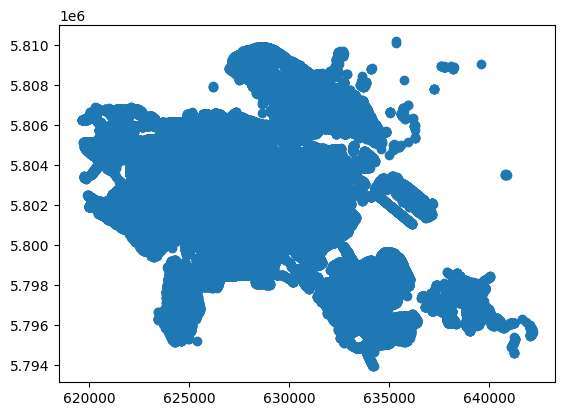

In [26]:
gdf2 = gpd.GeoDataFrame(
     df2,
     geometry=gpd.points_from_xy(df2['LNG'], df2['LAT']),
     crs = 'EPSG:4326'
     )

gdf2 = gdf2.to_crs(32631)

gdf2.plot()

/Users/michiel/Documents/code/SCL/throwing_shade/lukas/lib/python3.9/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver CSV does not support open option DELIMITER
  return ogr_read(


AttributeError: 'DataFrame' object has no attribute 'boundary'

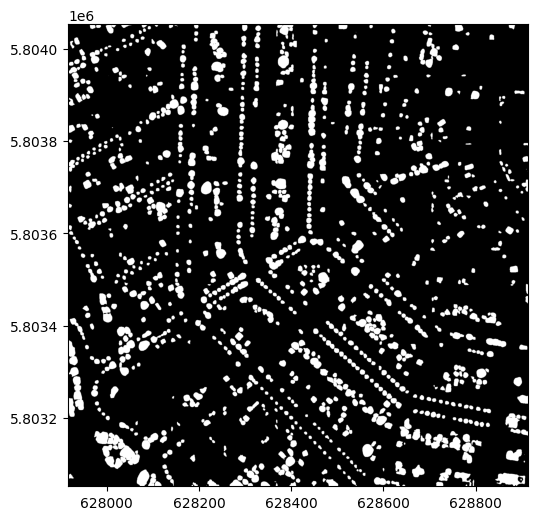

In [31]:
import rasterio as rio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show

# Specify the path to your raster file and shapefile
raster_path = "/Users/michiel/Documents/code/SCL/images/Lukas/verification.tif"
shapefile_path = "/Users/michiel/Documents/code/SCL/BOMEN.csv"  # Update with your shapefile path

# Load the raster data
with rio.open(raster_path) as src:
    band1 = src.read(1)
    transform = src.transform
    
# Load the shapefile
gdf2 = gpd.read_file(shapefile_path, delimiter = ';')
# gdf2 = gdf2.to_crs('EPSG:32631')  # Ensure it's in the same CRS as the raster

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the raster data
show(band1, ax=ax, cmap='gray', extent=rio.plot.plotting_extent(src))

# Plot the shapefile on top of the raster
gdf2.plot(ax=ax, linewidth=1, edgecolor='red')  # Change color and linewidth as needed

# Set titles and labels
plt.title('Raster with Shapefile Overlay')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
